## Notebook Setup

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [4]:
sns.set()

In [5]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: c:\Users\16096\Desktop\EverythingDataScience\08_Projects\Iris_Machine_Learning_Project


## Load Data

In [6]:
data = datasets.load_iris()

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
df = pd.DataFrame(data["data"], columns = data["feature_names"])

In [9]:
df["target"] = data['target']

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Basic descriptive statistics

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Distrobutions of features and target

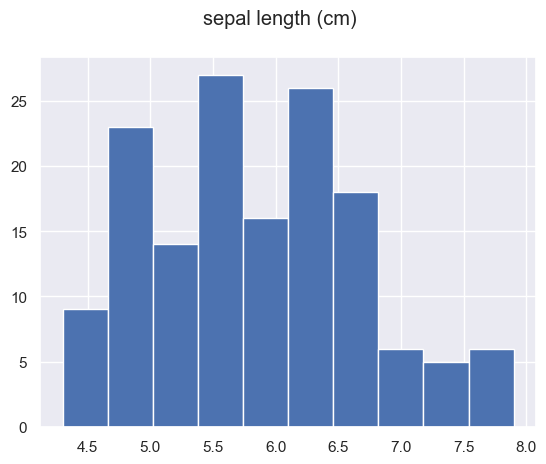

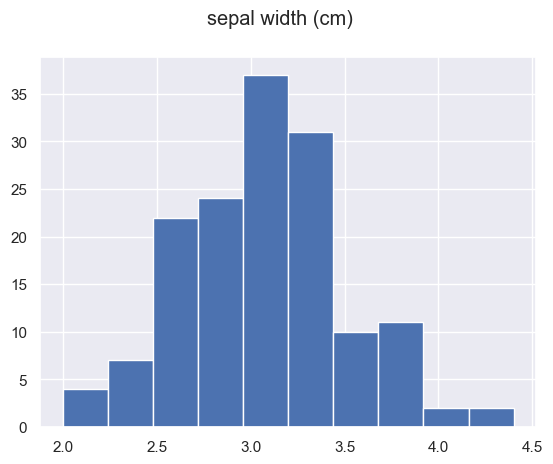

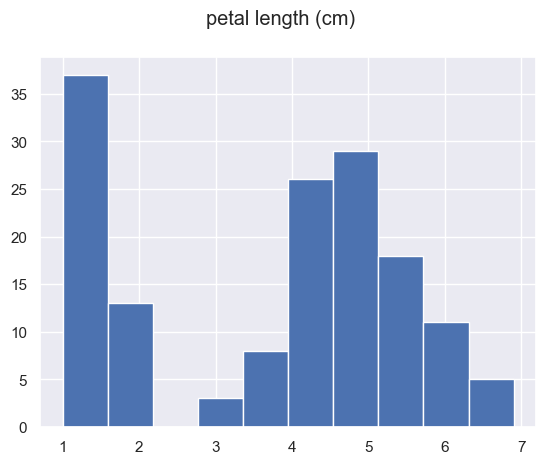

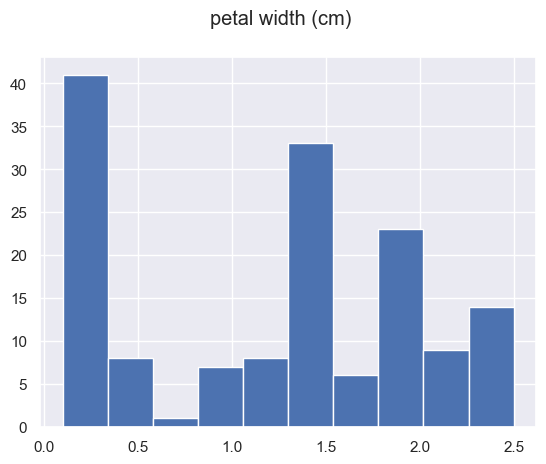

In [30]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for col in cols:
    df[col].hist()
    plt.suptitle(col)
    plt.show()

## Relationship of the data features with the target

In [26]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

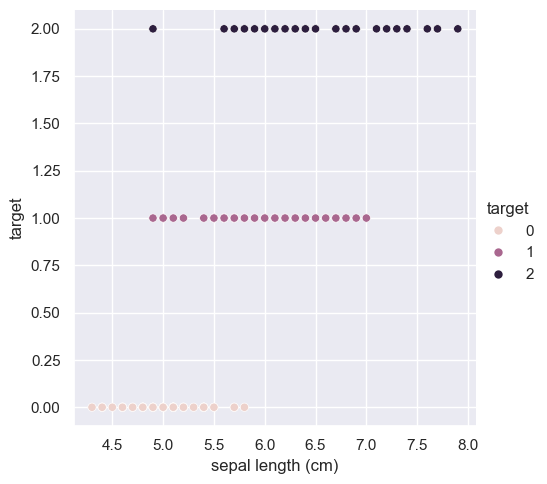

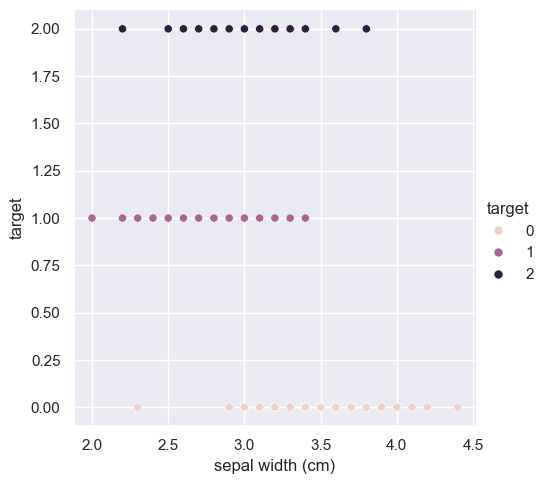

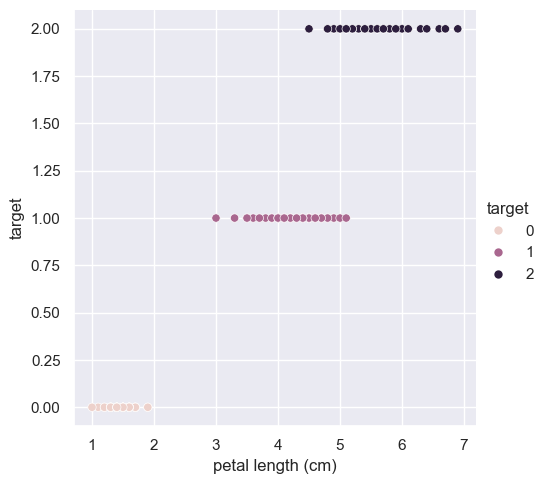

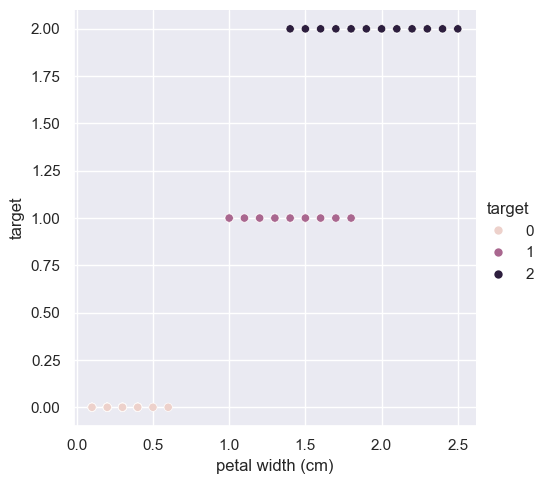

In [29]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for col in cols:
    sns.relplot(x = col, y = 'target', hue = 'target', data = df)

In [32]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Create new column with species name
df['target_names'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


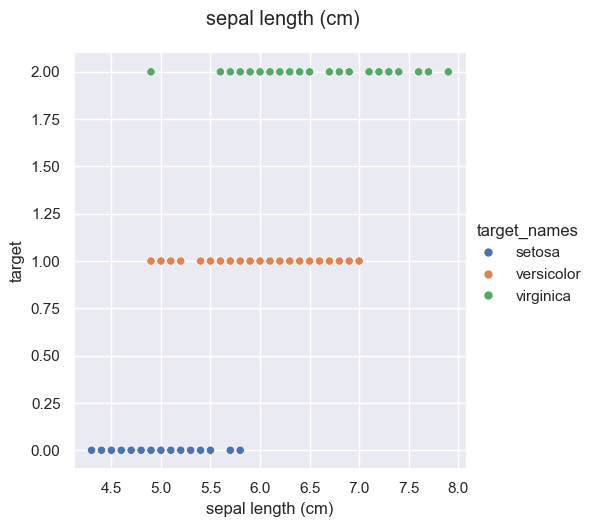

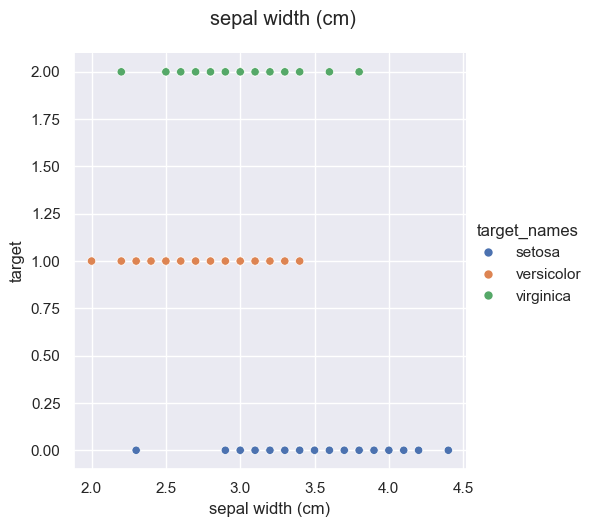

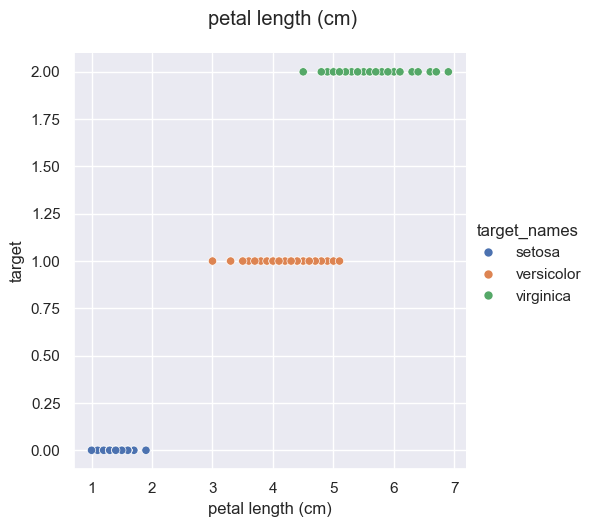

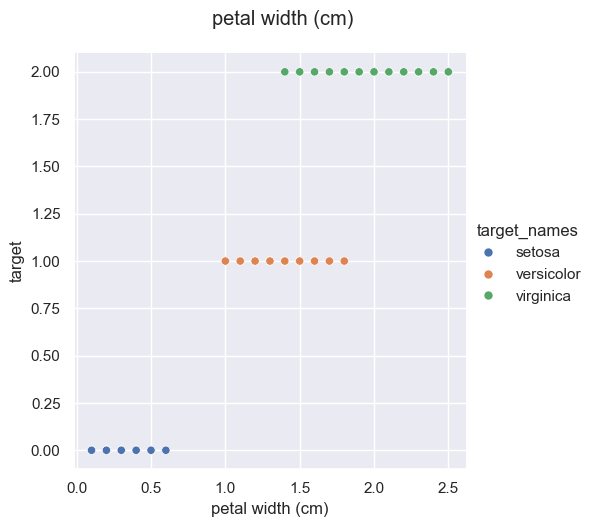

In [41]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for col in cols:
    sns.relplot(x = col, y = 'target', hue = 'target_names', data = df)
    plt.suptitle(col, y=1.05)
    plt.show()

# Exploratory Data Analysis (EDA) -  Pairplots 

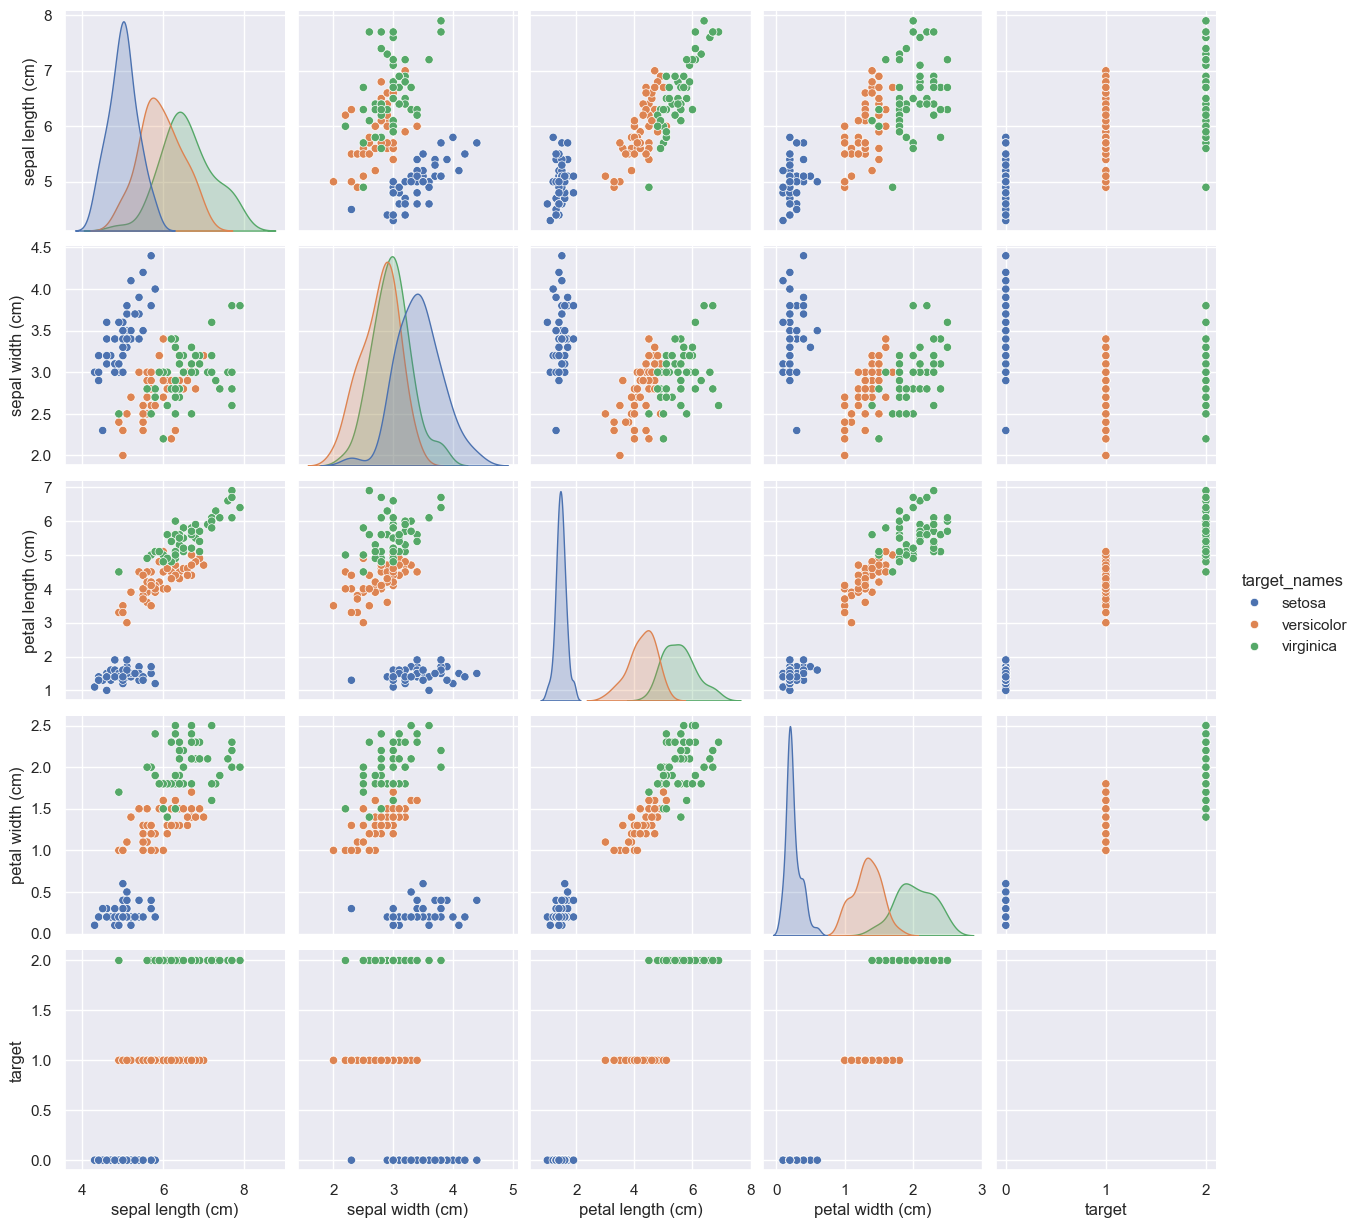

In [43]:
sns.pairplot(df, hue='target_names')

# Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25)

In [46]:
df_train.shape

(112, 6)

In [48]:
df_test.shape

(38, 6)

In [49]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
64,5.6,2.9,3.6,1.3,1,versicolor
116,6.5,3.0,5.5,1.8,2,virginica
84,5.4,3.0,4.5,1.5,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
133,6.3,2.8,5.1,1.5,2,virginica


# Prepare Our Data for Modeling
This involves splitting the data back out into NumPy arrays.

In [55]:
X_train = df_train.drop(columns=['target', 'target_names']).values
y_train = df_train['target'].values

In [56]:
X_train

array([[5.6, 2.9, 3.6, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [6.9, 3.1, 5.1, 2.3],
       [6.3, 2.8, 5.1, 1.5],
       [4.6, 3.6, 1. , 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.8, 2.6, 4. , 1.2],
       [6.5, 3. , 5.2, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [5. , 3.3, 1.4, 0.2],
       [5.2, 2.7, 3.9, 1.4],
       [5.4, 3.9, 1.7, 0.4],
       [4.9, 2.5, 4.5, 1.7],
       [5. , 2. , 3.5, 1. ],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.7, 5.1, 1.6],
       [5.6, 3. , 4.1, 1.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.6, 3. , 4.5, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [5.7, 2.6, 3.5, 1. ],
       [5.2, 4.1, 1.5, 0.1],
       [5.7, 2.5, 5. , 2. ],
       [6.3, 2.3, 4.4, 1.3],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 3.3, 1.7, 0.5],
       [5.1, 2.5, 3. , 1.1],
       [6. , 3. , 4.8, 1.8],
       [5.1, 3.5, 1.4, 0.3],
       [6.5, 3. , 5.8, 2.2],
       [4.9, 2.4, 3.3, 1. ],
       [4.9, 3.1, 1.5, 0.2],
       [7.2, 3

In [57]:
y_train

array([1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2,
       1, 0])

# Modeling - What is Our Baseline?

What is the simplest model we can think of?

In this case, if our baseline model is just randomly guessing a species of flower, we would expect to get the answer right a third of the time. So our model should beat 33%

# Modeling - Simple Manual Model

Let's manually look at our model and decide some cutoff points for classification.

In [ ]:
def singleFeaturePrediction(petal_length):
    '''Predicts flower species given the petal length'''
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [60]:
df_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_names'],
      dtype='object')

In [61]:
X_train[:, 2]

array([3.6, 5.5, 4.5, 5.1, 5.1, 1. , 1.4, 1.3, 4. , 5.2, 5.6, 1.4, 3.9,
       1.7, 4.5, 3.5, 5.1, 5.1, 4.1, 1.3, 4.5, 4. , 3.5, 1.5, 5. , 4.4,
       5.1, 1.7, 3. , 4.8, 1.4, 5.8, 3.3, 1.5, 5.8, 4.7, 1.6, 4.5, 4. ,
       4.9, 4.2, 1.4, 4.7, 1.5, 4.7, 4.1, 1.2, 1.3, 1.4, 6. , 6.3, 4.3,
       4. , 4.6, 4.8, 1.5, 6. , 5.1, 5.8, 1.4, 1.3, 1.5, 1.5, 4.2, 5.6,
       5.6, 5. , 4.2, 1.6, 6.4, 3.8, 1.4, 1.4, 1.4, 5.5, 1.3, 1.4, 5.6,
       4.6, 1.5, 4.8, 4.4, 6.6, 1.5, 5.3, 4.6, 5.6, 5.5, 1.3, 1.5, 5. ,
       6.9, 5.9, 1.9, 4.9, 6.1, 5.6, 5.3, 6.7, 4.4, 1.5, 1.7, 1.5, 5.7,
       5.4, 4.5, 4. , 4.7, 6.7, 6.1, 3.3, 1.6])

In [63]:
manual_y_predictions = np.array([singleFeaturePrediction(val) for val in X_train[:, 2]])

In [68]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)
print(f'Manual Model Accuracy: {manual_model_accuracy * 100:.2f}%')

Manual Model Accuracy: 95.54%


# Modeling - Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

### Using a Validation Set to evaluate our model

In [71]:
model = LogisticRegression()

In [ ]:
# Xt stands for X train and Xv stands for X validation
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.25)

In [73]:
model.fit(Xt, yt)

LogisticRegression()

In [75]:
y_pred = model.predict(Xv)

In [76]:
np.mean(y_pred == yv)

np.float64(0.9642857142857143)

In [77]:
model.score(Xv,yv)

0.9642857142857143

### Using Cross Validation to Evaluate our Model

In [78]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [79]:
model = LogisticRegression(max_iter=200)

In [83]:
accuracies = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')

In [84]:
np.mean(accuracies)

np.float64(0.9557312252964426)

# Where are we misclassifying points?

In [86]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)

In [89]:
predicted_correctly_mask = y_pred == y_train

In [90]:
X_train[predicted_correctly_mask]

array([[5.6, 2.9, 3.6, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [6.9, 3.1, 5.1, 2.3],
       [6.3, 2.8, 5.1, 1.5],
       [4.6, 3.6, 1. , 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.8, 2.6, 4. , 1.2],
       [6.5, 3. , 5.2, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [5. , 3.3, 1.4, 0.2],
       [5.2, 2.7, 3.9, 1.4],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2. , 3.5, 1. ],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 3. , 4.1, 1.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.6, 3. , 4.5, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [5.7, 2.6, 3.5, 1. ],
       [5.2, 4.1, 1.5, 0.1],
       [5.7, 2.5, 5. , 2. ],
       [6.3, 2.3, 4.4, 1.3],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 3.3, 1.7, 0.5],
       [5.1, 2.5, 3. , 1.1],
       [5.1, 3.5, 1.4, 0.3],
       [6.5, 3. , 5.8, 2.2],
       [4.9, 2.4, 3.3, 1. ],
       [4.9, 3.1, 1.5, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6.1, 2.9, 4.7, 1.4],
       [5.1, 3.8, 1.6, 0.2],
       [5.7, 2

In [91]:
not_predicted_correctly = ~predicted_correctly_mask

In [92]:
X_train[not_predicted_correctly]

array([[4.9, 2.5, 4.5, 1.7],
       [6. , 2.7, 5.1, 1.6],
       [6. , 3. , 4.8, 1.8],
       [5.9, 3.2, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7]])

In [93]:
df_predictions = df_train.copy()

In [94]:
df_predictions['correct_prediction'] = predicted_correctly_mask

In [96]:
df_predictions['prediction'] = y_pred

In [97]:
df_predictions['prediction_label'] = df_predictions['prediction'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [99]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_prediction,prediction,prediction_label
64,5.6,2.9,3.6,1.3,1,versicolor,True,1,versicolor
116,6.5,3.0,5.5,1.8,2,virginica,True,2,virginica
84,5.4,3.0,4.5,1.5,1,versicolor,True,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica,True,2,virginica
133,6.3,2.8,5.1,1.5,2,virginica,True,2,virginica


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

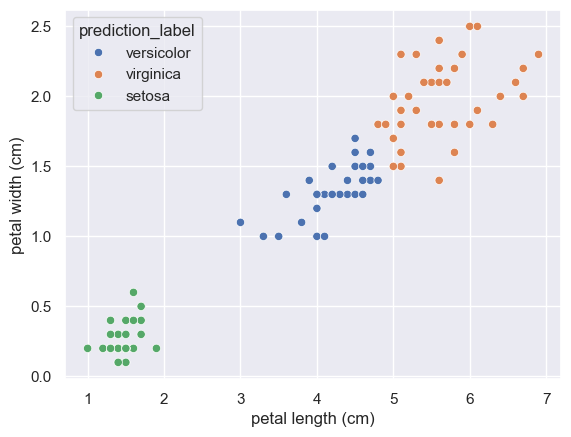

In [100]:
sns.scatterplot(x="petal length (cm)", y = "petal width (cm)", hue="prediction_label", data=df_predictions)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

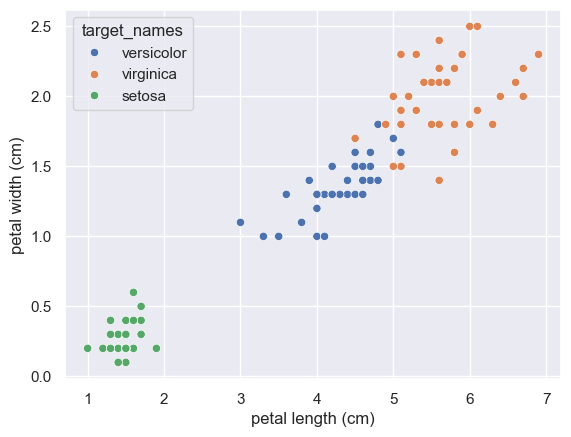

In [102]:
sns.scatterplot(x="petal length (cm)", y = "petal width (cm)", hue="target_names", data=df_predictions)

In [109]:
def plotIncorrectPredictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='prediction_label', data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='target_names', data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='correct_prediction', data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    plt.plot()

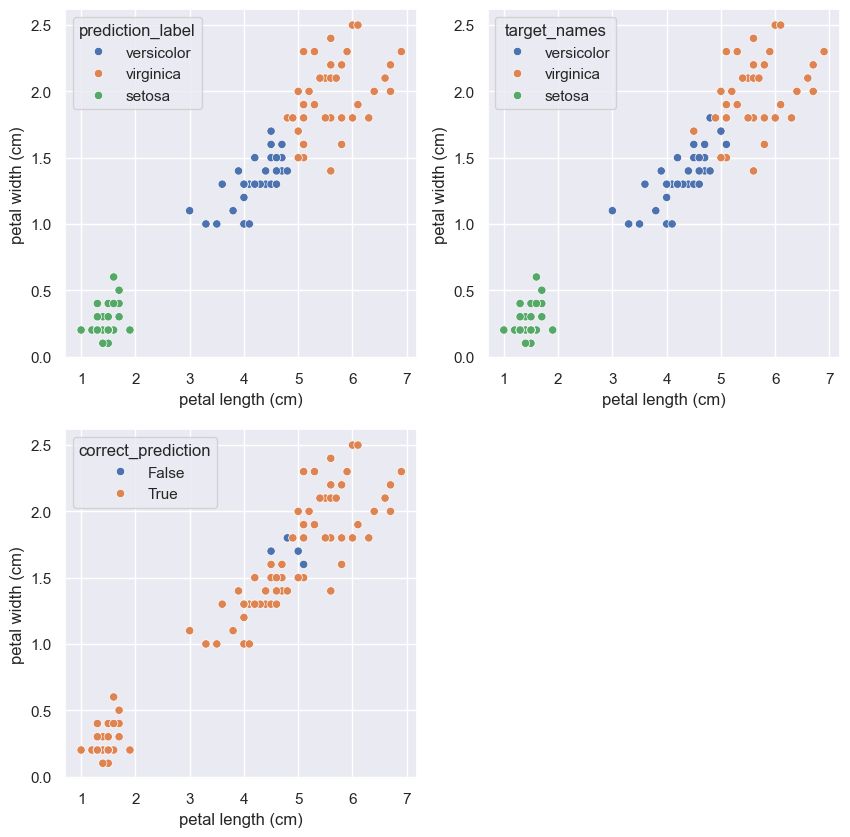

In [110]:
plotIncorrectPredictions(df_predictions, 'petal length (cm)', 'petal width (cm)')

# Model Tuning
Tuning hyperparameters to maximize results

In [137]:
for reg_param in (0.1, 0.3, 0.9, 1, 1.3, 1.9, 2, 3, 4):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))
    print(f'Accuracy: {accuracy * 100:.2f}%')

0.1
Accuracy: 91.90%
0.3
Accuracy: 95.53%
0.9
Accuracy: 95.57%
1
Accuracy: 95.57%
1.3
Accuracy: 95.57%
1.9
Accuracy: 95.57%
2
Accuracy: 95.57%
3
Accuracy: 96.44%
4
Accuracy: 96.44%


# Final Model

In [138]:
model = LogisticRegression(max_iter=200, C=3)

# How well does our model do on the test set?

In [144]:
X_test = df_test.drop(columns=['target', 'target_names']).values
y_test = df_test['target'].values

In [145]:
X_test.shape

(38, 4)

In [146]:
y_test.shape

(38,)

#### Train our final model using our full training dataset

In [147]:
model.fit(X_train, y_train)

LogisticRegression(C=3, max_iter=200)

In [149]:
y_test_pred = model.predict(X_test)

In [150]:
test_set_correctly_classified= (y_test_pred == y_test)
test_set_accuracy = np.mean(test_set_correctly_classified)

In [151]:
print(f'Test Set Accuracy: {test_set_accuracy * 100:.2f}%')

Test Set Accuracy: 100.00%
